In [1]:
import loans
import search
import json
import csv
import pandas as pd
from zipfile import ZipFile, ZIP_DEFLATED
from io import TextIOWrapper
import time
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
applicant = loans.Applicant(">75", ["1", "2", "3"])
applicant.race


{'American Indian or Alaska Native', 'Asian', 'Black or African American'}

In [3]:
repr(applicant)

"Applicant('>75', ['American Indian or Alaska Native', 'Asian', 'Black or African American'])"

In [4]:
applicant.lower_age()

75

In [5]:
sorted([
    loans.Applicant(">75", ["43", "44"]),
    loans.Applicant("20-30", ["1", "3"]),
    loans.Applicant("35-44", ["22"]),
    loans.Applicant("<25", ["5"]),
])


[Applicant('20-30', ['American Indian or Alaska Native', 'Black or African American']),
 Applicant('<25', ['White']),
 Applicant('35-44', ['Chinese']),
 Applicant('>75', ['Other Pacific Islander', 'Samoan'])]

In [6]:
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}

loan = loans.Loan(values)

In [7]:
loan.interest_rate

3.0

In [8]:
loan.applicants

[Applicant('55-64', ['White'])]

In [9]:
loan

<Loan: 3.0% on $225000.0 with 1 applicant(s)>

In [10]:
for amt in loan.yearly_amounts(80000):
    print(amt)


225000.0
151750.0
76302.5


In [11]:
loan.loan_amount

225000.0

In [12]:
lcu = loans.Bank("Landmark Credit Union")

In [13]:
lcu.lei

'549300KY533JFETOYG46'

In [14]:
print(lcu.loan_list[-1])


<Loan: 2.88% on $305000.0 with 1 applicant(s)>


In [15]:
print(len(lcu.loan_list))


17632


In [16]:
bank = loans.Bank("Merchants Bank of Indiana")

In [17]:
#Q1 
interests = bank.loan_list
sumInt = 0
count = 0
for i in interests:
    if i.interest_rate != -1:
        sumInt += i.interest_rate
        count += 1
    
sumInt/count

3.2181818181818183

In [18]:
#Q2
sumApp= 0
count = len(interests)
for i in interests:
    sumApp += len(i.applicants)

sumApp/count

1.6724137931034482

In [19]:
#Q3
ages = {}
for i in interests:
    if i.app1Age in ages.keys():
            ages[i.app1Age] += 1
    else:
        ages[i.app1Age] = 1
    if len(i.applicants) == 2:
        if i.app2Age in ages.keys(): 
            ages[i.app2Age] += 1
        else:
            ages[i.app2Age] = 1
ages

{'65-74': 6, '<25': 2, '35-44': 43, '25-34': 28, '45-54': 16, '55-64': 2}

In [20]:
mbi_tree = search.BST()
for i in interests: 
    mbi_tree.add(i.interest_rate, i)
# mbi_tree.root.values

In [21]:
#Q4
len(mbi_tree[-1.0])

3

In [22]:
#Q5
mbi_tree.height(mbi_tree.root)

8

In [23]:
bank2 = loans.Bank("Landmark Credit Union")
interests2 = bank2.loan_list
tree = search.BST()
# mbi_tree.root.key

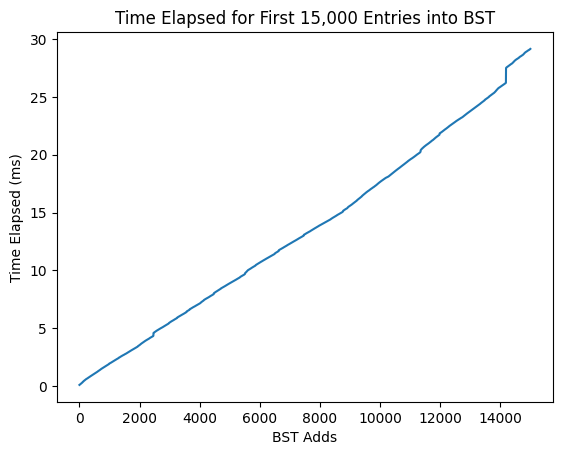

In [24]:
#Q6
num = []
totalTime = []
startTime = time.time()
for i in range(15000): 
    tree.add(interests2[i].interest_rate, interests2[i])
    endTime = time.time()
    num.append(i)
    totalTime.append((endTime-startTime) * 1e3)


plt.plot(num,totalTime)
plt.title("Time Elapsed for First 15,000 Entries into BST")
plt.xlabel("BST Adds")
plt.ylabel("Time Elapsed (ms)")
plt.show()

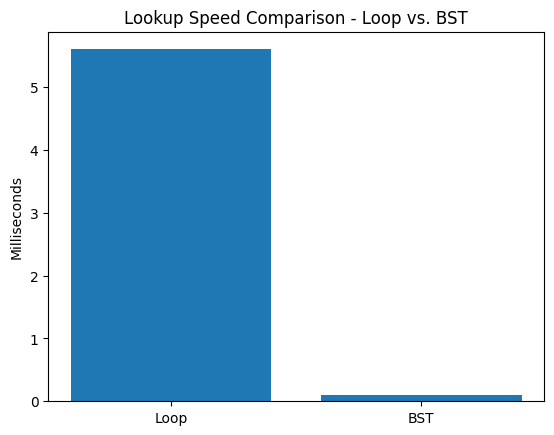

In [25]:
#Q7
categories = ["Loop", "BST"]
times = []
loopStart = time.time()
count = 0
for i in interests2:
    if i.interest_rate == 1.99:
        count += 1
loopEnd = time.time()
times.append((loopEnd-loopStart) * 1e3)

bstStart = time.time()
len(tree[1.99])
bstEnd = time.time()
times.append((bstEnd-bstStart) * 1e3)
for i in interests2:
    tree.add(i.interest_rate, i)

plt.bar(categories, times)
plt.title("Lookup Speed Comparison - Loop vs. BST")
plt.ylabel("Milliseconds")
plt.show()

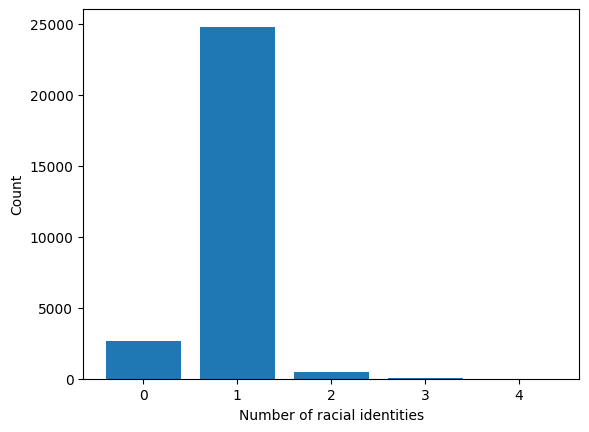

In [26]:
#Q8
#{0: 2639, 1: 24799, 2: 478, 3: 51, 4: 6}
races = {}
for i in interests2:
    if len(i.applicants[0].race) in races.keys():
        races[len(i.applicants[0].race)] += 1
    else:
        races[len(i.applicants[0].race)] = 1
        
    if len(i.applicants) == 2:
        if len(i.applicants[1].race) in races.keys(): 
            races[len(i.applicants[1].race)] += 1
        else:
            races[len(i.applicants[1].race)] = 1
races = dict(sorted(races.items()))
# races
plt.bar(races.keys(), races.values())
plt.xlabel("Number of racial identities")
plt.ylabel("Count")
plt.show()

In [27]:
#Q9
# recursive function or method to count the number of leaf nodes present in the given BST
tree.findLeaves(tree.root)

63

In [28]:
#Q10
def findTopN(root, n, count):
    result = None
    #if the root is not none
    if root != None:
        #recurse through the right side
        result = findTopN(root.right, n, count)
        #check if the result is not none 
        if result != None:
            return result
        #increment number of visited nodes
        count[0] += 1
        #check if count matches n because then it is the n largest value
        if count[0] == n:
            return root.key
        #recurse through the left side
        result = findTopN(root.left, n, count)
    return result
findTopN(tree.root, 3, [0])

9.85